# scores prediction using linear regression model

In [6]:
# import all the libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

In [9]:
# import the data 
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [10]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


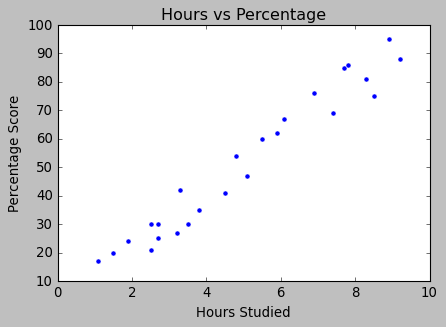

In [7]:
# visualization of the data
plt.style.use('classic')
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [12]:
# get the features and the target 
features=df.drop('Scores', axis=1)
target=df['Scores']

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
# finding the best random state 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Create an empty DataFrame to store the results
data= pd.DataFrame(columns=['RMSE Train', 'RMSE Test', 'R2 Train', 'R2 Test',
                            'Mean Absolute Error train','Mean Absolute Error test'])

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=i)
    lr = LinearRegression()  
    lr.fit(x_train, y_train) 
    
    y_pred_train = lr.predict(x_train)
    y_pred_test = lr.predict(x_test)
    new_row_data = {'RMSE Train': mean_squared_error(y_train, y_pred_train, squared=False),
                    'RMSE Test': mean_squared_error(y_test, y_pred_test, squared=False),
                    'R2 Train': r2_score(y_train, y_pred_train),
                    'R2 Test': r2_score(y_test, y_pred_test),
                   'Mean Absolute Error train':mean_absolute_error(y_train, y_pred_train),
                    'Mean Absolute Error test':mean_absolute_error(y_test, y_pred_test)}
    new_row_df = pd.DataFrame([new_row_data], index=['random_state'+str(i)])

    # Append the new row to the existing DataFrame
    data = data.append(new_row_df)

data.sort_values(by='Mean Absolute Error test')


,RMSE Train,RMSE Test,R2 Train,R2 Test,Mean Absolute Error train,Mean Absolute Error test
random_state60,5.708959,3.802453,0.942975,0.944132,5.341977,3.256972
random_state82,5.743697,3.941164,0.941189,0.981082,5.349487,3.670797
random_state96,5.688390,3.897598,0.946828,0.972347,5.312731,3.768767
random_state92,5.640515,4.303313,0.948296,0.938387,5.210245,3.825483
random_state26,5.642493,4.148255,0.942619,0.977806,5.263743,3.862779
...,...,...,...,...,...,...
random_state29,4.714017,7.842681,0.962162,0.874883,4.461486,7.357770
random_state36,4.743133,7.765814,0.954756,0.343338,4.318207,7.696358
random_state35,4.600274,8.055170,0.963096,0.891466,4.345924,7.700839
random_state1,4.785984,8.299453,0.963785,0.842103,4.577806,7.882398


`THE BEST RANDOM STATE IS 60`

In [25]:
# TRAIN THE MODEL
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(features, target, 
                            test_size=0.2, random_state=60) 

In [26]:
lr= LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

In [27]:
# GET THE PREDICTIONS
y_pred=lr.predict(x_test)

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
14,17,13.765605
20,30,29.271268
11,62,60.282595
0,21,27.333060
9,25,29.271268


In [29]:
# test with  data
hours = np.array(9.25)
# Reshape to 2D array
reshaped_array = np.array(hours).reshape(-1, 1)

own_pred = lr.predict(reshaped_array)
print("No of Hours = {}".format(reshaped_array))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.74757780643364


In [39]:
# GET THE MEAN ABSOLUTE ERROR
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.256972083783501


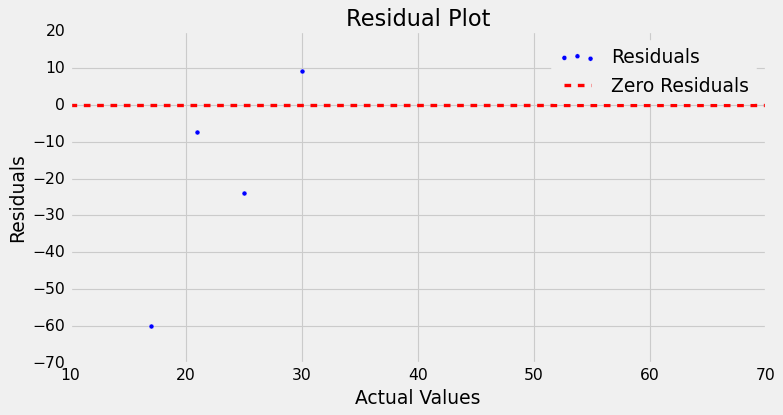

In [46]:
# GET THE RESIDUAL PLOT 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=(y_test - y_pred_test), color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=3, label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

In [ ]:
# CAN DEPLOY USING CODES BELOW 

In [47]:
import pickle
import streamlit

In [48]:
model=open('rfc.pickle','wb')
pickle.dump(lr,model)  
model.close()

In [49]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
import seaborn as sns
st.set_option('deprecation.showPyplotGlobalUse', False)

st.title('Scores Prediction based on Hours ')

df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

if st.sidebar.checkbox('View Data', False):
    st.write(df)
if st.sidebar.checkbox('View Distributions', False):
    sns.scatterplot(x=df['Hours'], y=df['Scores'])
    
    
# step 1 : load the pickled model
model=open('rfc.pickle','rb')
clf=pickle.load(model)
model.close()
    

# step 2. get the front end user input 
Hours=st.number_input('Hours of study',0,1)

#step 3: get the model input (convert user input to model imput)
input_data=[[Hours]]

#step 4: get the prediction and print the results 

prediction=clf.predict(input_data)[0]
st.button('Predict')
st.success(f'The predicted car purchase amount is: {prediction:.2f}')

Writing app.py
